# These are the codes for the development of the ML model for my final year project. 

# the aim is to begin to create the final file for my project. 

In [1]:
# import os

# for dirname,_, filenames in os.walk('kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname,file))

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import joblib
# magic class is used here 
%matplotlib inline 

In [3]:
# import the dataset for the project. this is where the data is included to the project
# df is a variable name for the dataframe. 
df = pd.read_csv("../my project codes/Datasets/Prostate_Cancer.csv")

In [4]:
# this uses the pandas module to output the top 5 elemenst of the dataset. 
# iot reads the dataframe and prints the top 5 elements 
print(df.head())

   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [5]:
print(df.columns)

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')


In [6]:
# parameter reduction by column dropping 
# this line of code removes the id column and so reducing the dataset number of columns by 1 
df.drop('id', axis = 1, inplace = True)

In [7]:
# notice the difference.The id column has been removed and so the dataset remains as. 
print(df.head(5))

  diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                M      23       12        151   954       0.143        0.278   
1                B       9       13        133  1326       0.143        0.079   
2                M      21       27        130  1203       0.125        0.160   
3                M      14       16         78   386       0.070        0.284   
4                M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


In [8]:
# the classification varaible is a dictionary describing the status of each element 
# the classification is mapped to the diagnosis result, so M is one meaning that malignant tumors are 1 and benign tumors(b) are 0
# this chaning the text data to numeric using a simple mapping 
classification = {'B':0, 'M':1}
df['diagnosis_result'] = df['diagnosis_result'].map(classification)

In [9]:
# the new dataset
# this dataset is the final set for the training of the SVM 
print(df.head(5))

   diagnosis_result  radius  texture  perimeter  area  smoothness  \
0                 1      23       12        151   954       0.143   
1                 0       9       13        133  1326       0.143   
2                 1      21       27        130  1203       0.125   
3                 1      14       16         78   386       0.070   
4                 1       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [10]:
#Run other models here.
# I want to create a funtion that does everything and 
# have one point of entry for everything

In [11]:
# the shape of the data is shown below 
# the dataset after reduction is 100 by 9 table. 100 row and 9 columns 
df.shape

(100, 9)

In [12]:
print(df.describe())

       diagnosis_result      radius     texture   perimeter         area  \
count        100.000000  100.000000  100.000000  100.000000   100.000000   
mean           0.620000   16.850000   18.230000   96.780000   702.880000   
std            0.487832    4.879094    5.192954   23.676089   319.710895   
min            0.000000    9.000000   11.000000   52.000000   202.000000   
25%            0.000000   12.000000   14.000000   82.500000   476.750000   
50%            1.000000   17.000000   17.500000   94.000000   644.000000   
75%            1.000000   21.000000   22.250000  114.250000   917.000000   
max            1.000000   25.000000   27.000000  172.000000  1878.000000   

       smoothness  compactness    symmetry  fractal_dimension  
count  100.000000   100.000000  100.000000         100.000000  
mean     0.102730     0.126700    0.193170           0.064690  
std      0.014642     0.061144    0.030785           0.008151  
min      0.070000     0.038000    0.135000           0.0530

In [13]:
print(type(df.columns))

<class 'pandas.core.indexes.base.Index'>


In [14]:
print(df.columns)
#diagnosis_result is the predictor

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')


In [15]:
print(df.iloc[:, 1: 10])

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2               0.060  
3  

In [16]:
def train_and_fit(df,model,model_name):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1: 10], 
                                                    df['diagnosis_result'], test_size = 0.3)

    # fit the model
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    #acc = accuracy_score(y_test, preds)
    print(f'These are the results when using {model_name}')
    #print(f'Successfully trained model with an accuracy of {acc:.2f}')
    plot_confusion_matrix(model, x_test,y_test) 
    print(classification_report(y_test, preds))
    
    return model

In [17]:
# this is the import of the svc module form the sklearn module 
# SVC stands for Support Vector Classification
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# this splits arrays or matrices into random trains and train subsets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [18]:
# SVC is saved to a variable of 
model_svc = SVC()
model_logistic = model = GaussianNB()
model_nb = GaussianNB()

These are the results when using SVM
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.85      0.85      0.85        20

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.80      0.80      0.80        30



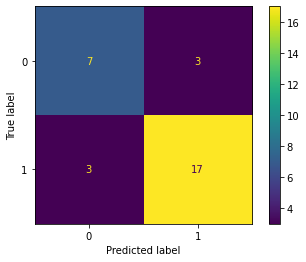

In [25]:
mdl = train_and_fit(df,model_svc,"SVM")

These are the results when using Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.82      0.88      0.85        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



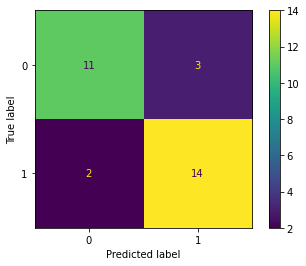

In [24]:
mdl = train_and_fit(df,model_logistic,"Logistic Regression")

These are the results when using Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.83      0.88      0.86        17

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



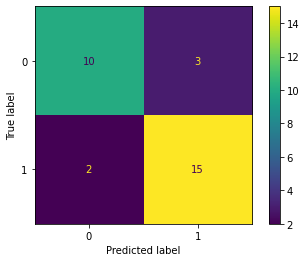

In [23]:
mdl = train_and_fit(df,model_nb,"Naive Bayes")

In [26]:
 x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1: 10], 
                                                    df['diagnosis_result'], test_size = 0.3)

In [27]:
#From this point is the tuning of the SVM to get the best model.

# change of kernel 

parameter = {'c': [0.1,1,10,100,1000,10000], 
             'kernel':['rbf'], 
             'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(estimator = SVC(), param_grid={'C': [0.1,1,10,100,1000,10000], 'kernel': ['rbf'], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]},
             refit=True, verbose = 3)

In [30]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.929, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.786, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.786, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.857, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ..... C=1000, gamma=1e-05, kernel=rbf, score=0.786, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] ..... C=1000, gamma=1e-05, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10000, gamma=0.1, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [32]:
pred = grid.predict(x_test)

[[ 9  5]
 [ 3 13]]


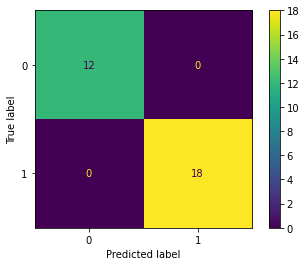

In [33]:
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(grid, x_test,pred)
#print(classification_report(x_test,y_test, pred))

In [34]:
from joblib import dump, load

In [35]:
# serialize model and save the final best model
joblib.dump(mdl, 'cancer_model.mdl')

['cancer_model.mdl']

In [36]:
model_columns = list(x_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [40]:
print("this is one ","this is two ", "this is three");

this is one  this is two  this is three
